In [150]:
print(data)

{'Access Token': '944922295-yIeWoNtQKA8fOh6Rt1cgssGiOI5RAgVYdWe392HH', 'Access Token Secret': 'kmM1tJ0nK1vmOW92ODn5DrG8WOVn8jSRLQnLjH980MV2P', 'Consumer Key (API Key)': 'uVENk9pttXI08BhqpcGlO3ajB', 'Consumer Secret (API Secret)': '4vNKoi0zman2rbTEG4vrNdRPk9K83GIRC0Ow9b0zrsk7AYWE8q'}


In [152]:
CONSUMER_KEY

'uVENk9pttXI08BhqpcGlO3ajB'

In [153]:
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

In [155]:
for status in twitter.search(q='"#machinelearning"')["statuses"]:
    user = status["user"]["screen_name"].encode('utf-8')
    text = status["text"].encode('utf-8')

In [156]:
tweets = []

In [157]:
from twython import TwythonStreamer

In [159]:
class myStreamer(TwythonStreamer):
    """Our own subclass of TwythonStreamer that specifies how to interact with the stream"""
    
    def on_success(self, data):
        """What do we do when Twitter sends us data? We'll put it into a Python dictionary representing a tweet."""
        
    #we only speak english
        if data['lang'] == 'en':
            tweets.append(data)
            print("received tweet #", len(tweets))
        
        if len(tweets) >=1000:
            self.disconnect()
    
    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()

In [160]:
stream = myStreamer(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

In [178]:
# starts consuming public, <= keyword, that contain the keyword you select
stream.statuses.filter(track='Trump')

received tweet # 990
received tweet # 991
received tweet # 992
received tweet # 993
received tweet # 994
received tweet # 995
received tweet # 996
received tweet # 997
received tweet # 998
received tweet # 999
received tweet # 1000


In [228]:
#tweets[10]

In [227]:
#for tweet in tweets:
 #   print(tweet['text'])

In [202]:
created_at = []
for tweet in tweets:
    created_at.append(tweet['created_at'])

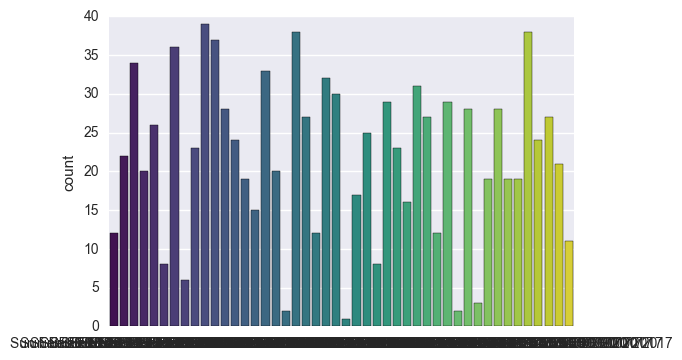

In [210]:
sns.countplot(created_at,palette='viridis')

In [ ]:
#tweets[10]['entities']['user_mentions'][0]['name']

In [141]:
tweets[10]['user']['name']

'Joan of Snarc 🏹'

In [211]:
from collections import Counter

In [212]:
top_friends = Counter(tweet['user']['name'] for tweet in tweets)

In [213]:
import numpy as np

In [214]:
keys = []

In [215]:
for key in top_friends.keys():
    keys.append(key)

In [216]:
keys = np.array(keys)

In [229]:
#keys.sort()
#print(keys)

In [235]:
retweets = []
text_lengths = []

In [236]:
for status in twitter.search(q='"#Arsenal"')["statuses"]:
    user = status['user']["screen_name"].encode('utf-8')
    text = status['text'].encode('utf-8')
    retweet_count = status['retweet_count']
    retweets.append(retweet_count)
    text_lengths.append(len(text))

In [237]:
retweets

[185, 185, 0, 5528, 0, 185, 5528, 0, 34, 0, 0, 185, 0, 0, 0]

In [238]:
text_lengths

[77, 77, 139, 66, 78, 77, 66, 144, 80, 47, 146, 77, 141, 141, 45]